<a href="https://colab.research.google.com/github/dmintz2/Machine-Learning-Projects/blob/master/California_House_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Values California

In [0]:
import pandas as pd
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

#Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()    

In [8]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
housing.head()    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
print (housing['ocean_proximity'].value_counts())
housing.describe()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


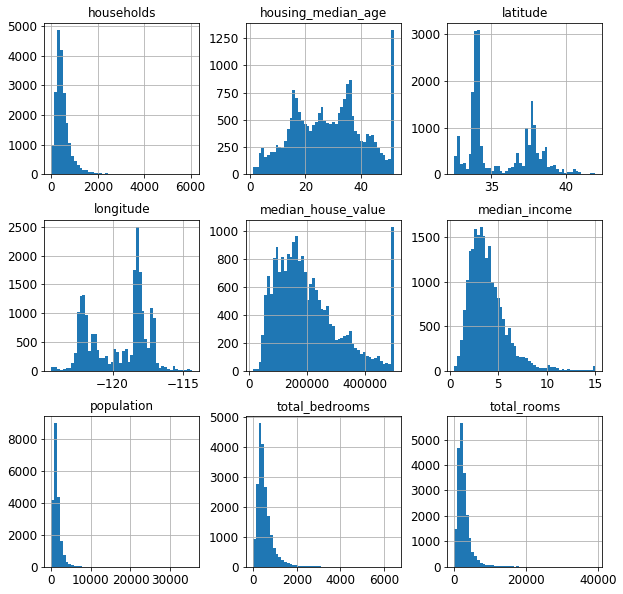

In [11]:
housing.hist(bins=50, figsize=(10,10))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split (housing, test_size = 0.2, random_state = 42)
print (len(train_set),len(test_set))

16512 4128


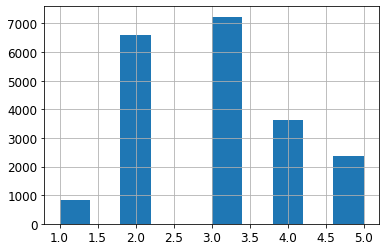

In [13]:
housing["income_cat"] = pd.cut(housing["median_income"],
                        bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                        labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()

In [0]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(housing, test_size=0.25, 
                               stratify=housing['income_cat']) 

In [15]:
test['income_cat'].value_counts() / len(test)

3    0.350581
2    0.318798
4    0.176357
5    0.114535
1    0.039729
Name: income_cat, dtype: float64

In [16]:
print (housing["income_cat"])

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [0]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


In [0]:
housing = strat_train_set.copy()

# Visualize the Data

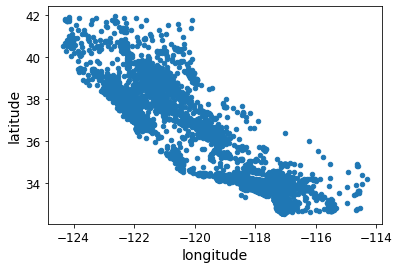

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude")


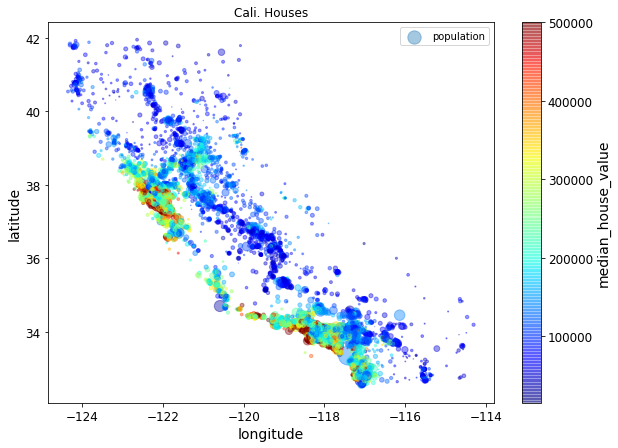

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, title="Cali. Houses",
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()


In [23]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

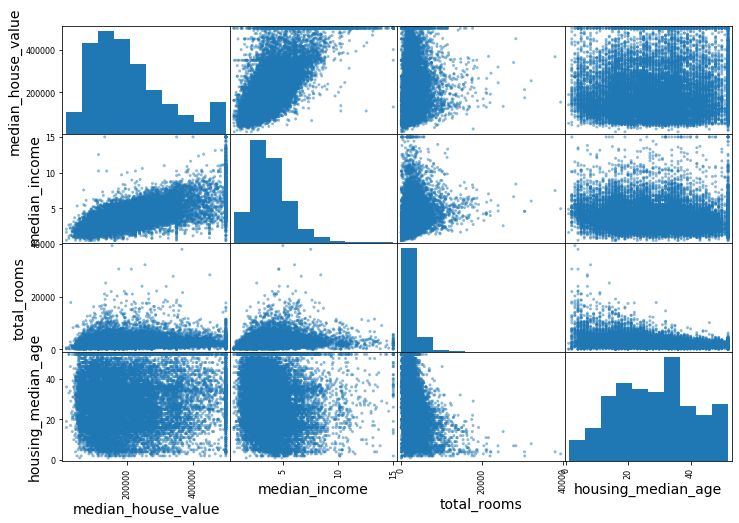

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));

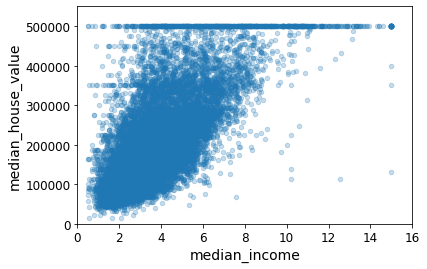

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.25)
plt.axis([0, 16, 0, 550000]);

In [26]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [27]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,5.505618,0.193878,3.808989


# Data Cleaning

In [28]:
housing = strat_test_set.drop(columns='median_house_value')
housing_lables = strat_test_set['median_house_value'].copy()
display (housing.columns, housing_lables)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

5241     500001.0
10970    240300.0
20351    218200.0
6568     182100.0
13285    121300.0
           ...   
20519     76400.0
17430    134000.0
4019     311700.0
12107    133500.0
2398      78600.0
Name: median_house_value, Length: 4128, dtype: float64

In [29]:
# filling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.455  ,   34.22   ,   28.     , 2158.5    ,  441.     ,
       1172.     ,  416.     ,    3.51475])

In [30]:
housing_num.median()

longitude             -118.45500
latitude                34.22000
housing_median_age      28.00000
total_rooms           2158.50000
total_bedrooms         441.00000
population            1172.00000
households             416.00000
median_income            3.51475
dtype: float64

In [0]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [0]:
housing_cat = housing[['ocean_proximity']]

In [33]:
housing_cat.values

array([['<1H OCEAN'],
       ['<1H OCEAN'],
       ['<1H OCEAN'],
       ...,
       ['<1H OCEAN'],
       ['INLAND'],
       ['INLAND']], dtype=object)

In [34]:
# Encoding one-hot encoding the categorical column 
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
display (housing_cat_1hot)


<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

# Feature Scaling

In [38]:
"""from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)"""

housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375


In [43]:
# showe all numerical columns names
# housing_num - we dropped the category column before
list (housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_attribs = list(housing_num) 
cat_attribs = ["ocean_proximity"]
# scaler = StandardScaler()

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
print (housing_prepared)
print (full_pipeline.transformers_)
print (housing.head())

[[ 0.57471497 -0.69620912  0.03285951 ...  0.          0.
   0.        ]
 [ 0.83839441 -0.86074221  0.82471029 ...  0.          0.
   0.        ]
 [ 0.24635944 -0.65390061 -0.12551065 ...  0.          0.
   0.        ]
 ...
 [ 0.52496413 -0.66800344  0.19122966 ...  0.          0.
   0.        ]
 [ 1.10704893 -0.75732141 -0.12551065 ...  0.          0.
   0.        ]
 [ 0.31601062  0.55894333 -0.75899128 ...  0.          0.
   0.        ]]
[('num', StandardScaler(copy=True, with_mean=True, with_std=True), ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']), ('cat', OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True), ['ocean_proximity'])]
       longitude  latitude  ...  median_income  ocean_proximity
5241     -118.39     34.12  ...         8.2816        <1H OCEAN
10970    -117.86     3